<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Dasar_Decission_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generate synthetic dataset using scikit-learn
# Dataset consists of 2000 samples with 10 features (7 informative and 3 redundant)
X, y = make_classification(n_samples=2000, n_features=10, n_informative=7, n_redundant=3, n_classes=2, random_state=42)

In [3]:
# Split dataset into training and testing sets
# 80% of data is used for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize the features to have mean 0 and variance 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Define the Decision Tree Classifier model
# Using criterion='gini' and setting a max depth to avoid overfitting
model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

In [6]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8475


In [9]:
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       196
           1       0.85      0.85      0.85       204

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400


Confusion Matrix:
[[166  30]
 [ 31 173]]


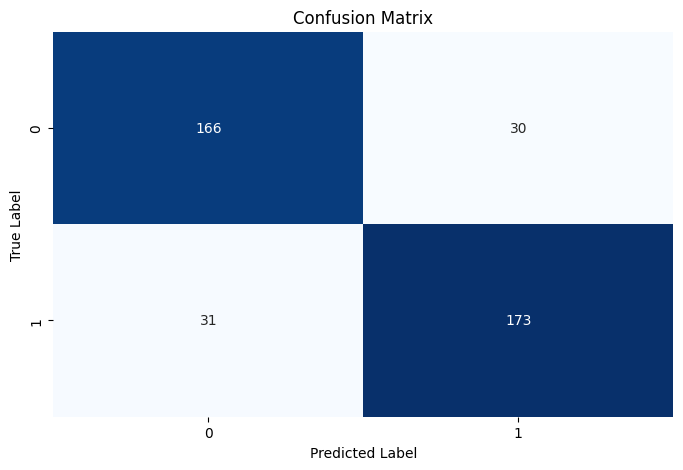

In [18]:
# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

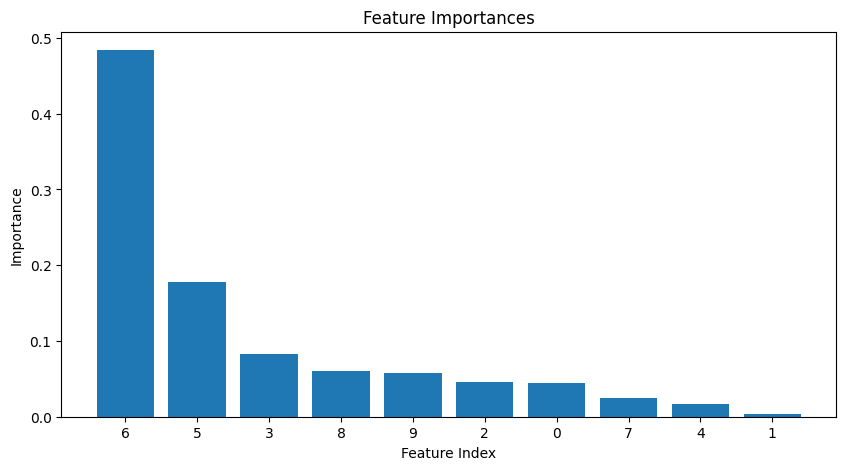

In [17]:
# Plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()

In [13]:
# Print first 10 predictions to verify
print("Predictions:", y_pred[:10])
print("True Labels:", y_test[:10])

Predictions: [0 1 0 0 0 1 1 1 0 0]
True Labels: [0 1 0 0 0 1 1 1 0 0]
